<img align="right" src="../../additional_data/banner_siegel.png" style="width:1000px;">

# Advanced Xarray

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Products used**: `Sentinel-2`
* **Prerequisites**:  Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_jupyter_introduction.ipynb)
    * The basic structure of the eo2cube [satellite datasets](02_eo2cube.ipynb)
    * How to browse through the available [products and measurements](03_products_and_measurements.ipynb) of the eo2cube datacube 
    * How to [load data from the eo2cube datacube](04_loading_data_and_basic_xarray.ipynb) 

## Background

The Python library `xarray` simplifies working with labelled multi-dimension arrays. The library introduces labels in the forms of dimensions, coordinates and attributes on top of `numpy` arrays. This structure allows easier and more effective handling of remote sensing raster data in a Python environment. Therefore, it is essential to fully understand the structure of an `xarray`. A first introduction into the usage of `xarray` within the eo2cube environment was given in ["04_loading_data_and_basic_xarray"](04_loading_data_and_basic_xarray.ipynb). This notebook builds on this gained knowledge and attempts to give a deeper understanding of the `xarray` data structure of raster data. If you are interested in learning more about the structures of the original `xarray`, have a look at this [**"introduction to xarray" notebook**](intro_to_xarray.ipynb) within the "intro_to_python" directory.
To get more information about the `xarray` package, visit the [offical documentation website](http://xarray.pydata.org/en/stable/).

## Description

This notebook introduces users to the `xarray` library within the datacube environment. It aims to deepen the understanding of the `xarray` structure as a container for remote sensing raster data. Also it introduces useful `xarray` functions to effectivly work with raster data in the eo2cube environment. Within this notebook the following topics are covered:

* Application of built-in `xarray` functions for analyzing raster data

***

## Setting up
### Load packages

The `datacube` package is required to query the eo2cube datacube database and load the requested data. The `with_ui_cbk` function from `odc.ui` enables a progress bar when loading large amounts of data. The `xarray` and `numpy` package are needed for the different methods and analysis steps within this notebook. 

In [4]:
import datacube
from odc.ui import with_ui_cbk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

dc = datacube.Datacube(app = "nb_understand_ndArrays")

### Datacube connection and load data

First we connect to the datacube and load an example dataset from the eo2cube. For this we will use the `s2_l2a_namibia` product. `ds` contains scenes of the `s2_l2a_namibia` product from January 2020 to March 2020.

In [5]:
# Sample of Namibia
ds = dc.load(product = "s2_l2a_namibia",
             measurements = ["blue", "green", "red"],
             longitude = [17.793, 17.809],
             latitude = [-24.564, -24.557],
             time = ("2020-01-01", "2020-03-31"),
             group_by = "solar_day",
            progress_cbk=with_ui_cbk())

ds

<xarray.Dataset>
Dimensions:      (time: 36, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) int16 823 861 889 769 698 ... 854 844 804 783 733
    green        (time, y, x) int16 1120 1146 1190 1086 ... 1182 1178 1124 1092
    red          (time, y, x) int16 1560 1596 1634 1530 ... 1632 1560 1518 1448
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

<a id='index_array3'></a>
## **Advanced Indexing**
### 1) Temporal Subset

In the earlier tutorial we introduced `isel()`and `sel()` for indexing data. For both methods a **slicing** operator exists. If the function `slice()` is passed onto the index function, the dataset can be sliced. 
The first example uses the slicing by position method to select the first five scenes in `data_1`. The start value is included and the stop value is excluded.

#### I. Using index number

In [19]:
#slice(0,5)
#ds.isel(time=slice(0,5)).time
#ds.isel(time = [0,1,2,3,4]).time

<xarray.DataArray 'time' (time: 5)>
array(['2020-01-02T09:07:17.000000000', '2020-01-04T08:57:22.000000000',
       '2020-01-07T09:07:17.000000000', '2020-01-09T08:57:21.000000000',
       '2020-01-12T09:07:16.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-01-12T09:...
    spatial_ref  int32 32734
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [18]:
ds.isel(time=slice(0,5))

<xarray.Dataset>
Dimensions:      (time: 5, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-01-12T09:...
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) int16 823 861 889 769 698 ... 852 802 774 753 713
    green        (time, y, x) int16 1120 1146 1190 1086 ... 1140 1126 1068 1036
    red          (time, y, x) int16 1560 1596 1634 1530 ... 1644 1614 1532 1448
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

This example uses the slicing by label method to select the scenes between "2020-01-02" and "2020-01-12". Note, that when using the `slice()` function with the `sel()` method, both start and stop value are included.

#### II. Using `datetime64` data

In [53]:
ds.sel(time=slice("2020-01-01", "2020-01-31")) # Namibia
#ds.sel(time=slice("01-01-2020", "01-31-2020"))
#print(ds.sel(time=slice("2019-12-01","2019-12-25"))) # Bavaria

#ds.sel(time=slice("2020-01-01", "2020-02-31")) # error
#ds.sel(time=slice("2018-01-01", "2018-01-31")) # wrong time frame

<xarray.Dataset>
Dimensions:      (time: 36, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) int16 823 861 889 769 698 ... 854 844 804 783 733
    green        (time, y, x) int16 1120 1146 1190 1086 ... 1182 1178 1124 1092
    red          (time, y, x) int16 1560 1596 1634 1530 ... 1632 1560 1518 1448
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

In [ ]:
#ds.sel(time=slice("2020-01-01", "2020-01-31")).time

#### III. Using other time dimensions

`xarray` also includes some useful features for the inspection of the time dimension. It allows to easily extract additional information from a dataset. The following code automatically groups the time dimension in seasons ("DJF", "MAM", JJA", "SON"). Since `ds` only contains scens from winter months, only the label "DJF" will appear. There are a lot of other `time` dimensions arguments, e.g. `month`, `week`, `weekday`, `dayofyear`.

In [25]:
#ds.time
#using special .dt accessor
#ds.time.dt

In [26]:
ds.time.dt.season

<xarray.DataArray 'season' (time: 36)>
array(['DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF',
       'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM'],
      dtype='<U3')
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
    spatial_ref  int32 32734

It is also possible to extract the "day of year" for a time step.

In [27]:
ds.time.dt.dayofyear

<xarray.DataArray 'dayofyear' (time: 36)>
array([ 2,  4,  7,  9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42,
       44, 47, 49, 52, 54, 57, 59, 62, 64, 67, 69, 72, 74, 77, 79, 82, 84,
       87, 89])
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
    spatial_ref  int32 32734

In [39]:
#ds.groupby('time.season').mean()

### 2) Spatial Subset
It is possible to index and **slice within the x and y dimensions**. The following example selects the value for each band of the pixel in the second colum of the raster and the fifth row of the raster (`x=2,y=5`)

In [43]:
ds.isel(x=2, y=5)
#ds.isel(x=[0,1,2], y=5)

<xarray.Dataset>
Dimensions:      (time: 36)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
    y            float64 7.28e+06
    x            float64 1.751e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time) int16 786 1140 753 0 800 0 ... 698 0 725 1052 714 993
    green        (time) int16 1128 1446 1078 0 1146 0 ... 0 1052 1262 1070 1300
    red          (time) int16 1546 1946 1494 0 1556 0 ... 0 1462 1706 1448 1768
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

### 3) Combining Temporal and Spatial Subset

Again, this method can be combined with the `slice()` operator to do a spatial subset of the dataset based on the position of the pixels. If you know the actual coordinate (x,y) value (extent) of the spatial subset area, use the `sel()` function.
Additionally, this subset can also be sliced in the time dimensions.

The following example subsets the `ds` by the spatial location of the pixels. Only the pixels from the first to the fifth column and the pixels from the first to the fifth row are included in the output. Also the scenes where filtered in the time dimension between the first and fifth time step.

In [87]:
ds2 = ds.isel(time=slice(0,5), x= slice(0,5), y=slice(0,5))
ds2

#ds2.time
#plt.scatter(ds2.x.values, ds2.y.values)

<xarray.DataArray 'time' (time: 5)>
array(['2020-01-02T09:07:17.000000000', '2020-01-04T08:57:22.000000000',
       '2020-01-07T09:07:17.000000000', '2020-01-09T08:57:21.000000000',
       '2020-01-12T09:07:16.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-01-12T09:...
    spatial_ref  int32 32734
Attributes:
    units:    seconds since 1970-01-01 00:00:00

## **Data Manipulation & Statistics**

This notebook presents some basic built-in functions of the `xarray` library to manipulate and transform data in a `xarray.Dataset`. In this notebook only a fraction of the available `xarray` functions are presented. For a complete overview of all the available functions and tools of the `xarray` package please visit the [documentation website](http://xarray.pydata.org/en/stable/). The [notebook 07](07_basic_analysis.ipynb) will cover this topic with a focus on an application oriented remote sensing approach.

###  1) Statistical Operation

The simple built-in functions allow the user to do simple calculations with a `xarray.Dataset`.
The **basic math** built-in `xarray` functions are:
* `min()`, `max()`
* `mean()`, `median()`
* `sum()`
* `std()`

The following code demonstrates the easy use of the `max()` function to extract the maximum value of the red band in the `ds` dataset.

In [92]:
print(ds.red.max())

<xarray.DataArray 'red' ()>
array(10088, dtype=int16)
Coordinates:
    spatial_ref  int32 32734


To apply a function to every value of a specified dimension (e.g. to calculate the mean of every time step) the `dim` argument in the basic math function must be define with the dimension label.

This examples calculates the mean of the `red` band for each pixel (defined by the unique `x`, `y` combination) over every time step. The result is a data array which can be used for further time series visualization and analysis.

In [100]:
print(ds.red.mean(dim=["x", "y"]))

#ds.red.mean(dim=["x", "y"]).values
#plt.plot(ds.red.mean(dim=["x", "y"]).values)

<xarray.DataArray 'red' (time: 36)>
array([1618.67013682, 1871.20865556, 1566.82666568, 1471.77840571,
       1600.29052647, 1848.95939917, 3024.54625223, 1289.06290898,
       1615.75014872, 1599.40660321, 1649.24479477, 1080.55993456,
       1588.98259964, 4716.02067222, 1552.65526472, 1466.87656157,
       1588.71244795, 1777.91805473, 8724.0056514 , 1796.16478287,
       7417.80844735, 1703.83625818, 1586.30339084, 2026.01918501,
       2543.56186794, 1612.23215348, 1467.81558596, 1643.90853659,
       1471.02520821, 1633.46259667, 1401.04082391, 1690.92147531,
       1409.61317668, 1580.03636228, 1440.76375669, 1606.81722189])
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
    spatial_ref  int32 32734


This examples works the other way around. It calculates the standard deviation of every pixel (`x`, `y`) over all timesteps of the dataset `ds`.

In [12]:
print(ds.red.std(dim="time"))

<xarray.DataArray 'red' (y: 82, x: 164)>
array([[1636.93925089, 1641.63041885, 1647.10786937, ..., 1662.80544859,
        1653.22843436, 1666.73809754],
       [1631.5492486 , 1637.21969517, 1646.22226253, ..., 1655.82743853,
        1646.29063314, 1663.08947964],
       [1629.2644434 , 1637.58155013, 1646.90916924, ..., 1659.31952437,
        1647.13530968, 1652.24026273],
       ...,
       [1608.0471555 , 1604.14777478, 1599.199301  , ..., 1666.62246238,
        1698.08833329, 1729.19837633],
       [1609.44859337, 1616.11444941, 1607.16664554, ..., 1637.41234051,
        1664.94538801, 1700.12610553],
       [1607.04050803, 1615.8350744 , 1613.74150312, ..., 1622.62118667,
        1665.57591715, 1692.8323652 ]])
Coordinates:
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734


Remember, to access the raw `numpy` array that stores the values of the resulting `xarray.DataArrays`, the suffix `.values` is needed. This allows you to work with the "actual" data values.

[ 11391001  14121316  10883784  10884384  10850927  14375723  33431206
   9300546  10836657  12330295  12474720   8040560  11196661  67624220
  11329227  10725750  10891288  13452006 139113704  19374024 114416628
  15346272  12184974  17325448  30707694  12643794  11556935  12436906
  10052716  12411204   9991866  12698768   9511944  12080506   9737017
  11594178]


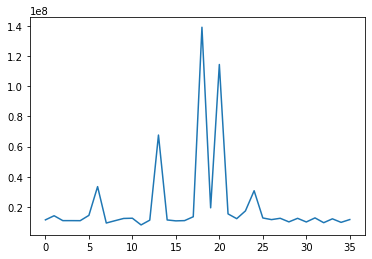

In [164]:
print(ds.blue.sum(dim=["x","y"]).values)
#plt.plot(ds.blue.sum(dim=["x","y"]).values)

### 2) Conditional Operation

Using conditional operation can be very helpful when we need to analyse satellite scenes or pixels lies within our interests. The `where()` function provides the option to **mask** a `xarray.Dataset` based on a logical condition. By default, the function converts all values that match the condition to NaN values. This is extremly useful when applied in combination with a binary mask to mask your data to the desired values. The argument `other` let´s you define a subset value for all values that match the condition (default is `nan`). The argument `drop` drops all values which do not match with the condition.
The following example masks the datatset `ds` to only the values which have a reflectance value of greater than 700 in the `red` band.

In [138]:
print(ds.where(ds.red > 700))
#print(ds.where(ds.red < 700))

<xarray.Dataset>
Dimensions:      (time: 36, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) float64 823.0 861.0 889.0 ... 804.0 783.0 733.0
    green        (time, y, x) float64 1.12e+03 1.146e+03 ... 1.124e+03 1.092e+03
    red          (time, y, x) float64 1.56e+03 1.596e+03 ... 1.518e+03 1.448e+03
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref


This code subsets all zeros in the red band of the dataset `ds` in the first time stamp with the new value -9999.

In [153]:
replace = ds.red.isel(time=0).where(ds.red != 0, other = -9999)
#replace.values.min()

-9999

The implemented `xarray` function `isin()` allows to **test each value** of `xarray.Dataset` or `xarray.DataArray` whether it is in the elements defined within the function. It returns a boolean array which can be used as a mask.
This example checks all the values of the `red` measurement if the value is in an array from 0 to 550.

In [162]:
mask_red = ds.red.isin(range(550))
print(mask_red)

#plt.imshow(mask_red) #error
#plt.imshow(mask_red.isel(time=3))

<xarray.DataArray 'red' (time: 36, y: 82, x: 164)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ...,

The created mask can easily be combined with the `where()` function to filter the dataset based on the predefined mask. In this case the `ds` dataset is masked with previously defined mask `mask_red`, which was based on a logical test if values of the `red` band are within a certain range of values.

In [163]:
print(ds.where(mask_red)) #masking

<xarray.Dataset>
Dimensions:      (time: 36, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T09:07:17 ... 2020-03-29T08:...
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    green        (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    red          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref


### 3) Resampling
Working with time series data, resampling is necessary if we want the data product aligns with the temporal window are interested in.

 - **resample()**

The **`resample()` method** allows to summarise the `xarray.Dataset` to bigger or smaller chunks based on a dimension. It handels both upsampling and downsampling. The argument `time` needs to be defined like a datetime-like coordinate. In the following example we resample the `ds` dataset to a monthly time intervall (`time = "m"`) and than calculate the median value for every resample chunk. _(this process takes a little while to run)_

In [165]:
print(ds.resample(time='m').median())

<xarray.Dataset>
Dimensions:      (time: 3, x: 164, y: 82)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-31 2020-02-29 2020-03-31
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) float64 773.0 788.5 816.0 ... 845.5 817.0 770.5
    green        (time, y, x) float64 1.096e+03 1.071e+03 ... 1.138e+03 1.1e+03
    red          (time, y, x) float64 1.532e+03 1.48e+03 ... 1.524e+03 1.439e+03


 - **groupby() method**

The **`groupby()` method** can also be used within the `xarray` library to *aggregate data over time*. Time aggregation arguments can be e.g. "time.year", "time.season", "time.month", "time.week", "time.day".
The code below groups the `ds` dataset into two groups by year. Therefore, a new "dimension" `year` is created. Then the median for each `year` is calculated. _(this process takes a little while to run)_

In [19]:
print(ds.groupby("time.year").median(dim="time"))

<xarray.Dataset>
Dimensions:      (x: 164, y: 82, year: 1)
Coordinates:
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
  * year         (year) int64 2020
Data variables:
    blue         (year, y, x) float64 797.5 799.5 840.0 ... 925.5 897.5 838.0
    green        (year, y, x) float64 1.08e+03 1.085e+03 ... 1.219e+03 1.171e+03
    red          (year, y, x) float64 1.52e+03 1.498e+03 ... 1.649e+03 1.56e+03


### 4) Interpolation
Interpolation is a common solution dealing with missing remote sensing data, either caused by coarse temporal resolution of the satellite, high cloud cover or bad quality of the scenes. For example, sometimes a scene of a specfic date is not available in the dataset. With the implemented `interp()` it is possible to **interpolate data** for predefined time steps. The function takes the next usable scene before and after the specified date and interpolates their values (default interpolation method is "linear") to build a new `xarray.Dataset`.

In this example, the `ds` dataset has missing scenes on the "2020-03-05". The `interp()` function builds a "new" scene based on an linear interpolation from the two measurments before and after the new time step.

In [20]:
print(ds.time)

<xarray.DataArray 'time' (time: 36)>
array(['2020-01-02T09:07:17.000000000', '2020-01-04T08:57:22.000000000',
       '2020-01-07T09:07:17.000000000', '2020-01-09T08:57:21.000000000',
       '2020-01-12T09:07:16.000000000', '2020-01-14T08:57:21.000000000',
       '2020-01-17T09:07:16.000000000', '2020-01-19T08:57:20.000000000',
       '2020-01-22T09:07:16.000000000', '2020-01-24T08:57:20.000000000',
       '2020-01-27T09:07:15.000000000', '2020-01-29T08:57:19.000000000',
       '2020-02-01T09:07:14.000000000', '2020-02-03T08:57:20.000000000',
       '2020-02-06T09:07:16.000000000', '2020-02-08T08:57:19.000000000',
       '2020-02-11T09:07:15.000000000', '2020-02-13T08:57:22.000000000',
       '2020-02-16T09:07:18.000000000', '2020-02-18T08:57:21.000000000',
       '2020-02-21T09:07:17.000000000', '2020-02-23T08:57:23.000000000',
       '2020-02-26T09:07:19.000000000', '2020-02-28T08:57:22.000000000',
       '2020-03-02T09:07:18.000000000', '2020-03-04T08:57:24.000000000',
       '2020-0

In [169]:
ds_interp = ds.interp(time=["2020-03-05"])
print(ds_interp)

<xarray.Dataset>
Dimensions:      (time: 1, x: 164, y: 82)
Coordinates:
  * y            (y) float64 7.28e+06 7.28e+06 7.28e+06 ... 7.28e+06 7.28e+06
  * x            (x) float64 1.751e+05 1.751e+05 ... 1.767e+05 1.768e+05
    spatial_ref  int32 32734
  * time         (time) datetime64[ns] 2020-03-05
Data variables:
    blue         (time, y, x) float64 1.011e+03 1.012e+03 ... 892.8 825.9
    green        (time, y, x) float64 1.241e+03 1.281e+03 ... 1.135e+03
    red          (time, y, x) float64 1.625e+03 1.611e+03 ... 1.484e+03
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref


The `merge()` function allows to **merge/join** `xarray.Datasets` or variables. By default the `merge()` function uses an "inner" join as merging operation. 
In our example the interpolated `xarray.Dataset` created above is merged to the `ds` dataset by using the default `merge()` function.

In [170]:
print(ds.merge(ds_interp).time)

<xarray.DataArray 'time' (time: 37)>
array(['2020-01-02T09:07:17.000000000', '2020-01-04T08:57:22.000000000',
       '2020-01-07T09:07:17.000000000', '2020-01-09T08:57:21.000000000',
       '2020-01-12T09:07:16.000000000', '2020-01-14T08:57:21.000000000',
       '2020-01-17T09:07:16.000000000', '2020-01-19T08:57:20.000000000',
       '2020-01-22T09:07:16.000000000', '2020-01-24T08:57:20.000000000',
       '2020-01-27T09:07:15.000000000', '2020-01-29T08:57:19.000000000',
       '2020-02-01T09:07:14.000000000', '2020-02-03T08:57:20.000000000',
       '2020-02-06T09:07:16.000000000', '2020-02-08T08:57:19.000000000',
       '2020-02-11T09:07:15.000000000', '2020-02-13T08:57:22.000000000',
       '2020-02-16T09:07:18.000000000', '2020-02-18T08:57:21.000000000',
       '2020-02-21T09:07:17.000000000', '2020-02-23T08:57:23.000000000',
       '2020-02-26T09:07:19.000000000', '2020-02-28T08:57:22.000000000',
       '2020-03-02T09:07:18.000000000', '2020-03-04T08:57:24.000000000',
       '2020-0

The `xarray` package contains a variety of other useful functions in addition to those shown here. There is a function for almost every operation needed in data analysis. For more information about the `xarray` package visit the [documentation website](http://xarray.pydata.org/en/stable/) or work through the [notebook]() in the "intro_to_python" folder.

The `xarray.Datasets` in the eo2cube datacube environment are a useful and effective structure for handeling remote sensing raster data. In this notebook you learned the basic structure and application methods of `xarray.Datasets`and `xarray.DataArrays`. However, it is very useful to not only work with the "raw" datasets and values. Sometimes it is necessary to get a visual overview of the data. The next [notebook 06](06_plotting.ipynb) will cover how to plot `xarray` raster data nicely and efficient. This is a very useful application, as it is often more convenient to visualize the raster data.

## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. [Loading Data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/03_data_lookup_and_loading.ipynb)
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. ***Xarray II: Index and Statistics (this notebook)***
6. [Plotting data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/06_plotting_basics.ipynb)
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. [Image Processing basics using NumPy and Matplotlib](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/II_numpy_image_processing.ipynb)
3. [Vector Processing](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/III_process_vector_data.ipynb)
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** February 2021